In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
results = pd.read_csv('./data/results.csv')
results.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
45090,2023-10-17,Zambia,Uganda,3,0,Friendly,Sharjah,United Arab Emirates,True
45091,2023-10-17,Morocco,Liberia,3,0,African Cup of Nations qualification,Agadir,Morocco,False
45092,2023-10-17,England,Italy,3,1,UEFA Euro qualification,London,England,False
45093,2023-10-17,Malta,Ukraine,1,3,UEFA Euro qualification,Ta' Qali,Malta,False
45094,2023-10-17,Serbia,Montenegro,3,1,UEFA Euro qualification,Belgrade,Serbia,False
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False
45099,2023-10-23,United Arab Emirates,Kuwait,1,0,Friendly,Dubai,United Arab Emirates,False


In [3]:
home_games = results.loc[results['home_team'] == 'France']
away_games = results.loc[results['away_team'] == 'France']



In [4]:
"""
Adding year as a column
"""
results['year'] = results['date'].apply(lambda x:int(x.split('-')[0]))

In [5]:
"""
Adding winner as a column
"""

results.loc[results.home_score > results.away_score, 'winner'] = results.home_team
results.loc[results.home_score < results.away_score, 'winner'] = results.away_team
results.loc[results.home_score == results.away_score, 'winner'] = 'Draw'

In [6]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland
...,...,...,...,...,...,...,...,...,...,...,...
45095,2023-10-17,Lithuania,Hungary,2,2,UEFA Euro qualification,Kaunas,Lithuania,False,2023,Draw
45096,2023-10-17,Finland,Kazakhstan,1,2,UEFA Euro qualification,Helsinki,Finland,False,2023,Kazakhstan
45097,2023-10-17,Northern Ireland,Slovenia,0,1,UEFA Euro qualification,Belfast,Northern Ireland,False,2023,Slovenia
45098,2023-10-17,San Marino,Denmark,1,2,UEFA Euro qualification,Serravalle,San Marino,False,2023,Denmark


In [7]:
"""
Getting number of game and won game for a country since a certain year
"""

def win_percentage(team, since):
    home_games = results.loc[(results['home_team'] == team) & (results['year'] >= since)]
    away_games = results.loc[(results['away_team'] == team) & (results['year'] >= since)]

    won_home = len(home_games.loc[home_games['home_score'] > home_games['away_score']])
    won_away = len(away_games.loc[away_games['away_score'] > away_games['home_score']])
    
    
    total_games = len(home_games) + len(away_games)

    if(total_games == 0):
        return 0

    p_win = (won_away + won_home) / total_games

    return p_win

team = 'Italy'
since = 2022

print(win_percentage(team, since))

0.47368421052631576


In [8]:
"""
Getting percentage of won game between 2 teams
"""

team_a = 'France'
team_b = 'Switzerland'

home_games = results.loc[(results['home_team'] == team_a) & (results['away_team'] == team_b) & (results['year'] > 2000)]
away_games = results.loc[(results['away_team'] == team_a) & (results['home_team'] == team_b) & (results['year'] > 2000)]

print(len(home_games))
print(len(away_games))

away_games.head()
home_games.head()


4
4


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,winner
27785,2005-03-26,France,Switzerland,0,0,FIFA World Cup qualification,Saint-Denis,France,False,2005,Draw
28750,2006-06-13,France,Switzerland,0,0,FIFA World Cup,Stuttgart,Germany,True,2006,Draw
38571,2016-06-19,France,Switzerland,0,0,UEFA Euro,Villeneuve-d'Ascq,France,False,2016,Draw
42832,2021-06-28,France,Switzerland,3,3,UEFA Euro,Bucharest,Romania,True,2021,Draw


(array([16.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         1.,  2.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
         0.,  0.,  1.,  2.,  2.,  2.,  2.,  6.,  1.,  0.,  2.,  2.,  6.,
         2.,  2.,  4.,  1.,  1.,  3.,  2.,  1.,  4.,  2.,  0.,  5.,  4.,
         5.,  3.,  2.,  0.,  3.,  3.,  4.,  1.,  2.,  5.,  7.,  4.,  6.,
         2.,  9.,  1.,  1.,  6.,  2.,  3.,  3.,  5.,  1.,  5.,  4.,  6.,
         6.,  5.,  8.,  8.,  3.,  6.,  3.,  4.,  3.,  3.,  2.,  3.,  4.,
         2.,  4.,  0.,  6.,  2.,  2.,  1.,  2.,  1.,  6.,  2.,  2.,  0.,
         0.,  3.,  1.,  0.,  0.,  4.,  0.,  1.,  0.,  0.,  2.,  1.,  0.,
         2.,  1.,  2.,  2.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
         2.,  0.,  0.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

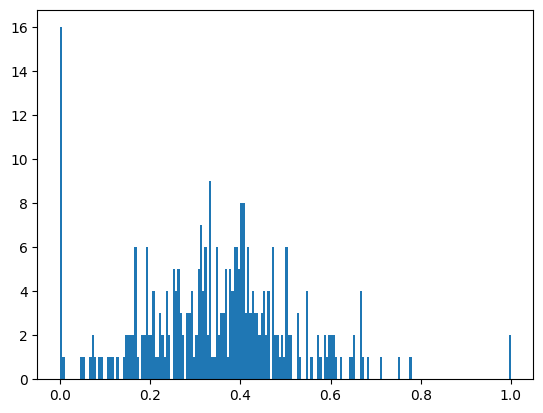

In [9]:
home_team = list(results.where(results['year'] > 2000)['home_team'].unique())
away_team = list(results.where(results['year'] > 2000)['away_team'].unique())

teams = set(home_team + away_team)

vals = []

for t in teams:
    vals.append(win_percentage(t, 2000))

fix, ax = plt.subplots()
ax.hist(vals, bins=200)

In [10]:
"""
Team result
"""

teams = ['Portugal', 'England', 'Switzerland', 'Serbia', 'France', 'Italy', 'Spain', 'Finland', 'Iceland']

for team in teams:
    matches_home = results.loc[(results['home_team'] == team) & (results['year'] >= 2000)]
    matches_away = results.loc[(results['away_team'] == team) & (results['year'] >= 2000)]

    matches_home = matches_home.assign(goal_d = lambda x: x.home_score - x.away_score)
    matches_away = matches_away.assign(goal_d = lambda x: x.away_score - x.home_score)

    goals_difference = np.array(list(matches_home.goal_d) + list(matches_away.goal_d))
    goals = np.array(list(matches_home.home_score) + list(matches_away.away_score))

    # fix, ax = plt.subplots()
    # ax.hist(goals, bins=10)

In [11]:
team_a = 'England'
team_b = 'France'

matches = results.loc[(((results['home_team'] == team_a) & (results['away_team'] == team_b)) | ((results['home_team'] == team_b) & (results['away_team'] == team_a))) & (results['year'] >= 1900)]

print(len(matches))

team_a_wins = matches.loc[results['winner'] == team_a]
team_b_wins = matches.loc[results['winner'] == team_b]
draw = matches.loc[results['winner'] == 'Draw']

print(len(team_a_wins)/len(matches) * 100)
print(len(team_b_wins)/len(matches) * 100)
print(len(draw)/len(matches) * 100)

34
50.0
32.35294117647059
17.647058823529413


In [12]:
"""
Average goals for a team
"""

team = 'France'

home_games = results.loc[(results['home_team'] == team) & (results['year'] >= since)]
away_games = results.loc[(results['away_team'] == team) & (results['year'] >= since)]

goals_scored = list(home_games.home_score) + list(away_games.away_score)

(array([3., 0., 6., 0., 7., 0., 3., 0., 3., 1.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

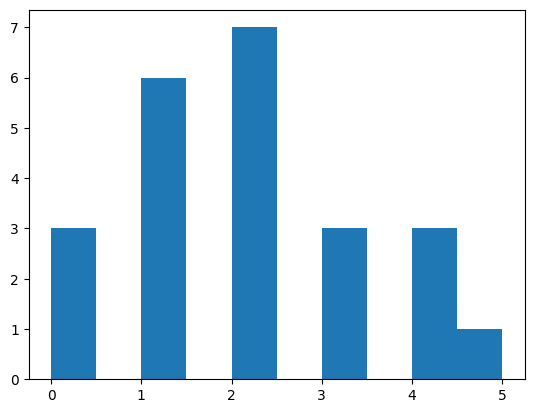

In [13]:
fix, ax = plt.subplots()
ax.hist(x = goals_scored, bins=10)

In [14]:
"""
Average goals for a team against another team
"""

team_a = 'Albania'
team_b = 'Croatia'

home = results.loc[(results['home_team'] == team_a) & (results['away_team'] == team_b) & (results['year'] >= 2010)]
away = results.loc[(results['home_team'] == team_b) & (results['away_team'] == team_a) & (results['year'] >= 2010)]

goals_team_a = np.array(list(home.home_score) + list(away.away_score))
goals_team_b = np.array(list(home.away_score) + list(away.home_score))

print(goals_team_a)
print(goals_team_b)

[]
[]


In [15]:
"""
Working example
"""
from simulator import *

teams = [
    [
        'Switzerland',
        'France',
        'Spain',
        'England'
    ]
]

s = Simulator(teams, results)

s.simulate_group_stage()


Switzerland 1 : 2 France
Switzerland 0 : 0 Spain
Switzerland 0 : 1 England
France 0 : 1 Spain
France 1 : 1 England
Spain 1 : 1 England


In [16]:
from trueskill import Rating, rate_1vs1, quality_1vs1

In [17]:
team_rating = {}
encountered_teams = []

for group in teams:
    for team in group:
        team_rating[team] = Rating()
        games = results.loc[((results['home_team'] == team) | (results['away_team'] == team)) & (results['year'] >= 2020)]
        print(len(games))

45
47
47
48


In [18]:
home_teams = results['home_team'].unique()
away_teams = results['away_team'].unique()

def get_ratings():
    all_teams = list(set(home_team + away_team))

    ratings = {team: Rating() for team in all_teams}

    for team in all_teams:

        home_games = results.loc[(results['home_team'] == team) & (results['year'] >= 2020)]

        for index in home_games.index:

            if(home_games['winner'][index] == 'Draw'):
                ratings[team], ratings[home_games['away_team'][index]] = rate_1vs1(ratings[team], ratings[home_games['away_team'][index]], drawn=True)

            elif(team == home_games['winner'][index]):
                ratings[team], ratings[home_games['away_team'][index]] = rate_1vs1(ratings[team], ratings[home_games['away_team'][index]])

            else:
                ratings[home_games['away_team'][index]], ratings[team] = rate_1vs1(ratings[home_games['away_team'][index]], ratings[team])
    return ratings


print(ratings['France'])
print(ratings['Switzerland'])
print(ratings['Albania'])

print(ratings)

print(quality_1vs1(ratings['France'], ratings['Portugal']))

NameError: name 'ratings' is not defined

In [19]:
import numpy as np
import itertools
from scipy import stats
from math import sqrt
from trueskill import BETA
from trueskill.backends import cdf

class Simulator:
    def __init__(self, groups: list, ratings: dict):
        self.groups = groups
        self.ratings = ratings

    def win_probability(self, player_rating, opponent_rating):
        delta_mu = player_rating.mu - opponent_rating.mu
        denom = sqrt(2 * (BETA * BETA) + pow(player_rating.sigma, 2) + pow(opponent_rating.sigma, 2))
        return cdf(delta_mu / denom)
    
    def simulate_game(self, team_a, team_b, group_index):
        
        draw_prob = quality_1vs1(self.ratings[team_a], self.ratings[team_b])
        win_a_prob = self.win_probability(self.ratings[team_a], self.ratings[team_b])

        draw = False
        if draw_prob > 0.9:
            draw = np.random.choice([True, False])

        if draw:
            self.ratings[team_a], self.ratings[team_b] = rate_1vs1(self.ratings[team_a], self.ratings[team_b], drawn=True)
            self.groups[group_index][team_a] += 1
            self.groups[group_index][team_b] += 1
        else :
            if win_a_prob - np.random.random() >= 0:
                self.ratings[team_a], self.ratings[team_b] = rate_1vs1(self.ratings[team_a], self.ratings[team_b])
                self.groups[group_index][team_a] += 3
            else:
                self.ratings[team_a], self.ratings[team_b] = rate_1vs1(self.ratings[team_a], self.ratings[team_b])
                self.groups[group_index][team_b] += 3

    def simulate_final_game(self, team_a, team_b):
        win_a_prob = self.win_probability(self.ratings[team_a], self.ratings[team_b])

        if win_a_prob - np.random.random() >= 0:
            return team_a
        else:
            return team_b


    def simulate_group_stage(self):
        for group in self.groups:
            teams = [team for team in group.keys()] # Get dict keys in list of dict
            games = list(itertools.combinations(teams, 2))
            for game in games:
                team_a, team_b = game
                self.simulate_game(team_a, team_b, self.groups.index(group))

    def create_8th_final_games(self):
        qualified = [list(group.keys())[:3] for group in self.groups]

        # A = 0
        # B = 1
        # C = 2
        # D = 3
        # E = 4
        # F = 5

        return [
            (qualified[1][0], qualified[0][2]),
            (qualified[0][0], qualified[2][1]),
            (qualified[5][0], qualified[1][2]),
            (qualified[3][1], qualified[4][1]),
            (qualified[4][0], qualified[2][2]),
            (qualified[3][0], qualified[5][1]),
            (qualified[2][0], qualified[3][2]),
            (qualified[0][1], qualified[1][1])
        ]
        
    def play_final_phase(self, games: list[tuple]):
        next = games

        while len(next) >= 1:
            winners = []
            for team_a, team_b in next:
                winner = self.simulate_final_game(team_a, team_b)

                winners.append(winner)

            next = list(zip(winners[::2], winners[1::2]))
            #print(winners)
            if len(winners) == 1:
                return winners




    def simulate_euro(self):
        self.simulate_group_stage()

        for i in range(len(self.groups)):
            group = self.groups[i]
            self.groups[i] = dict(sorted(group.items(), key=lambda x: x[1], reverse=True))
        
        games_8th_final = self.create_8th_final_games()

        return self.play_final_phase(games_8th_final)



In [20]:
groups = [
    {
        'Germany': 0,
        'Scotland': 0,
        'Hungary': 0,
        'Switzerland': 0,
    },
    {
        'Spain': 0,
        'Croatia': 0,
        'Italy': 0,
        'Albania': 0,
    },
    {
        'Slovenia': 0,
        'Denmark': 0,
        'Serbia': 0,
        'England': 0,
    },
    {
        'Netherlands': 0,
        'Austria': 0,
        'France': 0,
        'Poland': 0,
    },
    {
        'Belgium': 0,
        'Slovakia': 0,
        'Romania': 0,
        'Iceland': 0,
    },
    {
        'Turkey': 0,
        'Portugal': 0,
        'Czech Republic': 0,
        'Greece': 0,
    },
]

s = Simulator(groups=groups, ratings=get_ratings())


In [ ]:
nb_iter = 500
stat_team = {
        'Germany': 0,
        'Scotland': 0,
        'Hungary': 0,
        'Switzerland': 0,
        'Spain': 0,
        'Croatia': 0,
        'Italy': 0,
        'Albania': 0,
        'Slovenia': 0,
        'Denmark': 0,
        'Serbia': 0,
        'England': 0,
        'Netherlands': 0,
        'Austria': 0,
        'France': 0,
        'Poland': 0,
        'Belgium': 0,
        'Slovakia': 0,
        'Romania': 0,
        'Iceland': 0,
        'Turkey': 0,
        'Portugal': 0,
        'Czech Republic': 0,
        'Greece': 0,
    }
for i in range(nb_iter):
    winner = s.simulate_euro()[0]
    stat_team[winner] += 1/nb_iter  *100
    stat_team[winner] = stat_team[winner].__round__(2)
    #print(f"Winner: {winner}\n"
    #      f"stat: {stat_team[winner].__round__(2)}\n"
    #      f"Add: {round(1/nb_iter  *100, 1)}\n"
    #      f"------------------")

#for team in stat_team.keys():
#    stat_team[team] = round(stat_team[team] /nb_iter  *100, 3)

print(dict(sorted(stat_team.items(), key=lambda x: x[1], reverse=True)))

In [86]:
print(sum(stat_team.values()))

100.00000000000001


In [93]:
results = {'France': [22.83], 'Portugal': [21.12], 'England': [13.9], 'Spain': [10.52], 'Belgium': [6.65], 'Denmark': [5.7], 'Netherlands': [5.5], 'Italy': [4.57], 'Germany': [3.1], 'Croatia': [1.62], 'Hungary': [1.58], 'Austria': [0.97], 'Czech Republic': [0.73], 'Serbia': [0.67], 'Scotland': [0.35], 'Switzerland': [0.08], 'Slovakia': [0.08], 'Turkey': [0.03], 'Albania': [0.0], 'Slovenia': [0.0], 'Poland': [0.0], 'Romania': [0.0], 'Iceland': [0.0], 'Greece': [0.0]}
# print(len(list(mcolors.CSS4_COLORS)))
#name_colors = sorted(mcolors.CSS4_COLORS, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
#colors = [name_colors[i] for i in range(len(results.keys()))]

colors = [(0, 1-i, i) for i in np.arange(0,1,1/len(results.keys()))]
print(results)

dict_values([[22.83], [21.12], [13.9], [10.52], [6.65], [5.7], [5.5], [4.57], [3.1], [1.62], [1.58], [0.97], [0.73], [0.67], [0.35], [0.08], [0.08], [0.03], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]])


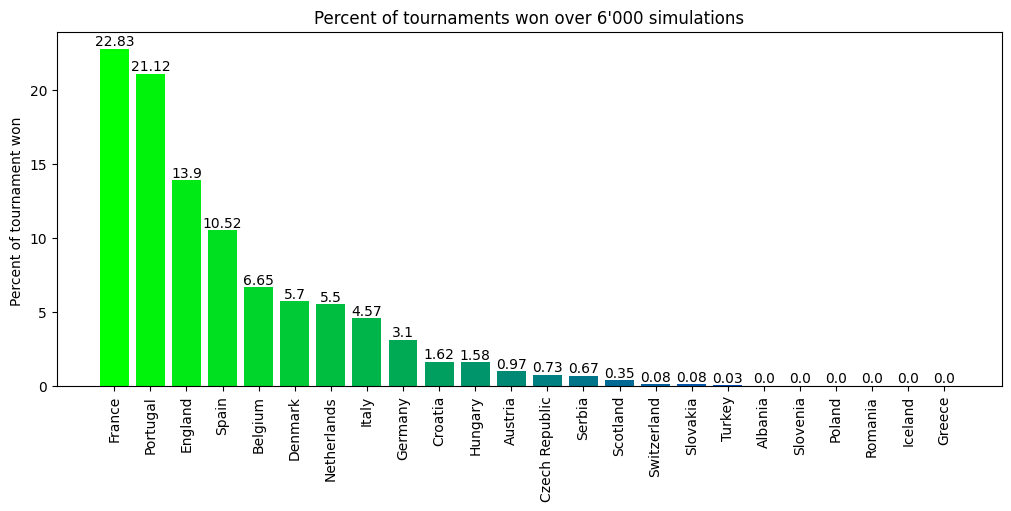

In [97]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))
rects = ax.bar(results.keys(), [a[0] for a in results.values()], color=colors)
ax.bar_label(rects, [a[0] for a in results.values()])
ax.set_ylabel('Percent of tournament won ')
ax.set_title('Percent of tournaments won over 6\'000 simulations')
ax.tick_params(axis='x', rotation=90)
plt.savefig('results.png')

In [99]:

df = pd.DataFrame(results)
df

,France,Portugal,England,Spain,Belgium,Denmark,Netherlands,Italy,Germany,Croatia,...,Scotland,Switzerland,Slovakia,Turkey,Albania,Slovenia,Poland,Romania,Iceland,Greece
0,22.83,21.12,13.9,10.52,6.65,5.7,5.5,4.57,3.1,1.62,...,0.35,0.08,0.08,0.03,0.0,0.0,0.0,0.0,0.0,0.0
